In [0]:
# 1. IMPORTACIÓN O GENERACIÓN DEL CONJUNTOS DE DATOS. (generación de imagenes y h5)

# Montaje del contenido del drive.
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import os
os.chdir('/content/drive/My Drive/DIPLOMADODP/TDG/Codigo/')
!ls 

In [0]:
# instalación de las librerías necesarias.
!pip install cython
!pip install tensornets

In [0]:
# Importación de librerías.

import tensorflow as tf
import tensornets as nets
import h5py
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io # Skimage para segmentaciòn imagenes.

In [0]:
# 2. LECTURA Y DIVISIÓN(EN TRAIN,TEST) DEL CONJUNTO DE DATOS.

#Leer de una base de datos H5
with h5py.File('bananos_train_dataset.h5','r') as h5data:                                                       
    ls=list(h5data.keys())                                          # Se obtienen los .keys del archivo h5data y se convierte en lista.   
    print("Los .keys de train_dataset son : ",(ls))
    train_data=np.array(h5data.get('train_set_x')[:])               # Se obtienen los .valores del 'train_set_x' y se convierte en array. 
    train_labels=np.array(h5data.get('train_set_y')[:])
print("La dimensión de train_data es   :",(train_data.shape))    
print("La dimensión de train_labels es :",(train_labels.shape)) 

with h5py.File('bananos_test_dataset.h5','r') as h5data:
    ls=list(h5data.keys())
    print("Los .keys de test_dataset son : ",(ls))   
    test_data=np.array(h5data.get('test_set_x')[:])
    test_labels=np.array(h5data.get('test_set_y')[:])
print("La dimensión de test_data   es   :",(test_data.shape))    
print("La dimensión de test_labels es   :",(test_labels.shape))  


Los .keys de train_dataset son :  ['train_set_x', 'train_set_y']
La dimensión de train_data es   : (1340, 224, 224, 3)
La dimensión de train_labels es : (1340, 1)
Los .keys de test_dataset son :  ['test_set_x', 'test_set_y']
La dimensión de test_data   es   : (335, 224, 224, 3)
La dimensión de test_labels es   : (335, 1)


In [0]:
# 3. DEFINICIÓN DE LOS HIPERPARAMETROS DEL ALGORITMO.

# Parámetros para el entrenamiento
training_epochs= 50                           # Número de veces que iterara en todo el dataset  
batch_size=10                                  # Número de imagenes que se procesara en cada iteración.
learning_rate = 0.001                          # ajuste que hara la red neuronal para acercarse a una solución optima.                             
display_step=1                                 # cantidad de pasos que se va a procesar la info en cada epoca


# Parametros de la red neuronal (para)
n_hidden_1 = 1024 # 1st layer number of neurons
n_hidden_2 = 256  # 2nd layer number of neurons
n_input = 2048    # data input (feature shape ?,7,7,2048)
n_classes = 4     # total classes

In [0]:
# 4. DEFINICION DE PLACEHOLDER.

X = tf.placeholder(tf.float32, [None, 224, 224, 3])                     Se procede a cargar la base de datos y a separar los datos de entrenamiento y de test, de los cuales.

# creo el placeholder definiendo el tipo y tamaño, luego se le indicara como recibir la info.
X2 = tf.placeholder(tf.float32, [None, 7, 7, 2048])
Y = tf.placeholder("float", [None, n_classes])

print (X)
print (X2)
print (Y)

Tensor("Placeholder_6:0", shape=(?, 224, 224, 3), dtype=float32)
Tensor("Placeholder_7:0", shape=(?, 7, 7, 2048), dtype=float32)
Tensor("Placeholder_8:0", shape=(?, 4), dtype=float32)


In [0]:
# 5 DEFINICIÓN DEL MODELO USANDO ARQUITECTURA ResNet50

# Para cargar el modelo con la libreria tensornet
# tf.reset_default_graph()
model = nets.ResNet50(X)
assert isinstance(model, tf.Tensor)



In [0]:
# 3. PREPOCESAMIENTO Y NORMALIZACIÓN DE LOS DATOS.

# Funcion para cambiar de tamaño las imágenes para adpatarlas a la arquitectura
def resize_np (np_array):
    resize=[]
    for i in list(np_array):
        larger=cv2.resize(i,(224,224))
        resize.append(np.array(larger))
    return (np.array(resize).astype(np.float32))

# Funcion para cambiar labels a onehot
def one_hot_transformation(labels,n_classes):
    samples=labels.size
    one_hot_labels=np.zeros((samples,n_classes))
    for i in range(samples):
        one_hot_labels[i,labels[i]]=1
    return(one_hot_labels)


In [0]:
# Redimensiòn(funciòn resize_np): las imagenes redimensionadas se almacenaran en X_train y X_test

X_train=resize_np(train_data)  # cambia el tamaño de train_data y lo guarda en x_train 
print("La dimensión de X_train es   :",(X_train.shape))

X_test=resize_np(test_data)
print("La dimensión de X_test  es   :",(X_test.shape))


# one hot: cambio de dimensiones del array.

Y_train=one_hot_transformation(train_labels,n_classes)
Y_test=one_hot_transformation(test_labels,n_classes)
print(Y_train.shape)
print(Y_test.shape)

La dimensión de X_train es   : (1340, 224, 224, 3)
La dimensión de X_test  es   : (335, 224, 224, 3)
(1340, 4)
(335, 4)


In [0]:
"""
los valores almacenados en middles o en outputs, son salidas en capas intermedias 
de la arquitectura, y estas salidas se pueden usar como entradas para capas definidas 
por nosotros. Estas capas puede ser solo el MLP o Full conected al final de la arquitectura...
"""

print("El RESUMEN DEL MODELO ES :")
model.print_summary() #Summary es una clase, aplicada al objeto model.

print("\n")
model.get_middles() 

#assert middles[0].shape == (1, 56, 56, 256)
#assert middles[-1].shape == (1, 7, 7, 2048)

print("\n")
print("LAS SALIDAS DEL MODELO SON  :")
model.print_outputs()

El RESUMEN DEL MODELO ES :
Scope: resnet50
Total layers: 54
Total weights: 320
Total parameters: 25,636,712




LAS SALIDAS DEL MODELO SON  :
Scope: resnet50
conv1/pad:0 (?, 230, 230, 3)
conv1/conv/BiasAdd:0 (?, 112, 112, 64)
conv1/bn/FusedBatchNorm:0 (?, 112, 112, 64)
conv1/relu:0 (?, 112, 112, 64)
pool1/pad:0 (?, 114, 114, 64)
pool1/MaxPool:0 (?, 56, 56, 64)
conv2/block1/0/conv/BiasAdd:0 (?, 56, 56, 256)
conv2/block1/0/bn/FusedBatchNorm:0 (?, 56, 56, 256)
conv2/block1/1/conv/BiasAdd:0 (?, 56, 56, 64)
conv2/block1/1/bn/FusedBatchNorm:0 (?, 56, 56, 64)
conv2/block1/1/relu:0 (?, 56, 56, 64)
conv2/block1/2/conv/BiasAdd:0 (?, 56, 56, 64)
conv2/block1/2/bn/FusedBatchNorm:0 (?, 56, 56, 64)
conv2/block1/2/relu:0 (?, 56, 56, 64)
conv2/block1/3/conv/BiasAdd:0 (?, 56, 56, 256)
conv2/block1/3/bn/FusedBatchNorm:0 (?, 56, 56, 256)
conv2/block1/out:0 (?, 56, 56, 256)
conv2/block2/1/conv/BiasAdd:0 (?, 56, 56, 64)
conv2/block2/1/bn/FusedBatchNorm:0 (?, 56, 56, 64)
conv2/block2/1/relu:0 (?, 56, 56, 64

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


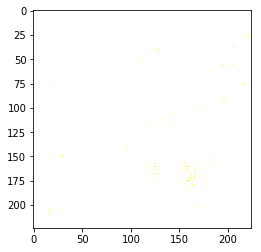

In [0]:
# mostrar un ejemplo
plt.imshow(X_test[10])

In [0]:
# DEFINICIÒN DEL MODELO: PERCEPTRON MULTICAPA

# Declaración de los pesos y los bias (weight & bias)
weights = {'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1],stddev=0.1)),
           'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2],stddev=0.1)),
           'out': tf.Variable(tf.truncated_normal([n_hidden_2, n_classes],stddev=0.1))
          }
biases = {'b1': tf.Variable(tf.truncated_normal([n_hidden_1],stddev=0.1)),
          'b2': tf.Variable(tf.truncated_normal([n_hidden_2],stddev=0.1)),
          'out': tf.Variable(tf.truncated_normal([n_classes],stddev=0.1))
         }

# Creaciòn del modelo: perceptrón multicapa

"""
tf.nn: la libreria nn (Neuronal Networks) contiene las funciones de activaciòn.
avg-pool: average pooling

"""

def multilayer_perceptron(x):
    pool = tf.nn.avg_pool(x, ksize=[1, 7, 7, 1], strides=[1, 1, 1, 1], padding='VALID')  #ksize: tamaño de la ventana.
    flat=tf.layers.flatten(pool) 
    layer_1 = tf.add(tf.matmul(flat, weights['h1']), biases['b1'])                       # Hidden fully connected layer with 256 neurons
    relu_1=tf.nn.relu(layer_1)                                                                                       #funcion de activación RELU
    layer_2 = tf.add(tf.matmul(relu_1, weights['h2']), biases['b2'])                     # Hidden fully connected layer with 256 neurons
    relu_2=tf.nn.relu(layer_2)
    out_layer = tf.matmul(relu_2, weights['out']) + biases['out']                        # Output fully connected layer with a neuron for each class
    return out_layer
    print(out_layer)

In [0]:
# Declarar la operación que aplica el MLP(MultiLayerPerceptron) usando la información de entrada
# Construct model
logits = multilayer_perceptron(X2)  
print(logits)
  

Tensor("add_5:0", shape=(?, 4), dtype=float32)


In [0]:
# 7. DECLARAR LA FUNCIÒN DE PERDIDA.
"""
funciòn de perdida: evalua que tambien funciona el modelo.
se declara las operaciónes que establecen la funciòn de perdida y optimización 
# para el entrenamiento.
"""

# Decalaraciòn de la funciòn de perdida
loss_op = tf.losses.softmax_cross_entropy(
    onehot_labels=Y,
    logits=logits,
    weights=1.0,
    scope=None,
    loss_collection=tf.GraphKeys.LOSSES,
    reduction=tf.losses.Reduction.SUM_BY_NONZERO_WEIGHTS)


correct_predictions = tf.equal(tf.argmax( logits ,1), tf.argmax( Y ,1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

# Declaraciòn del Optimizador.

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

saver = tf.train.Saver()


In [0]:
# 8. ENTRENAR EL MODELO.

# Initializing the variables (para que tome los valores)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    sess.run(model.pretrained())  # equivalent to nets.pretrained(model)
    for epoch in range(training_epochs): #
        avg_cost = 0.
        #obtiene el numero de grupos en que queda dividida la base de datos
        total_batch = int(Y_train.shape[0]/batch_size) 
        # ciclo para entrenar con cada grupo de datos
        losses=[]
        for i in range(total_batch-1):
            batch_x= X_train[i*batch_size:(i+1)*batch_size]
            batch_y= Y_train[i*batch_size:(i+1)*batch_size]
            features = model.preprocess(batch_x)
            features = sess.run(model.get_middles(), feed_dict={X: batch_x})[-1]
            
            # Correr la funcion de perdida y la operacion de optimización 
            # con la respectiva alimentación del placeholder
            _,c =sess.run([train_op, loss_op],feed_dict={X2:features,Y:batch_y})
            # Promedio de resultados de la funcion de pérdida
            losses.append(c)
            avg_cost += c / total_batch
        # Mostrar el resultado del entrenamiento por grupos
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
        saver.save(sess, "/content/drive/My Drive/DIPLOMADODP/TDG/Codigo/test-model", global_step=1) 
print("Optimization Finished!")

102899712/102891672 [==============================] - 37s 0us/step
Epoch: 0001 cost=0.600765330
Epoch: 0002 cost=0.222464359
Epoch: 0003 cost=0.116069756
Epoch: 0004 cost=0.017685092
Epoch: 0005 cost=0.049873869
Epoch: 0006 cost=0.122687887
Epoch: 0007 cost=0.052770370
Epoch: 0008 cost=0.026124888
Epoch: 0009 cost=0.031757246
Epoch: 0010 cost=0.006553349
Epoch: 0011 cost=0.000000935
Epoch: 0012 cost=0.000000933
Epoch: 0013 cost=0.000000904
Epoch: 0014 cost=0.000000876
Epoch: 0015 cost=0.000000849
Optimization Finished!


En el siguiente ejemplo se muestra como cargar una arquitectura pre-entrenada para usarla con un dato nuevo.

In [0]:
# PROCESO DE MODEL RESTORED.

# Iniciar la sesión 
saver = tf.train.Saver()
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
sess.run(model.pretrained())

saver.restore(sess, "/content/drive/My Drive/DIPLOMADODP/TDG/Codigo/test-model-1")        # Se crearan los archivos test-model-1.data;test-model-1.meta;test-model-1.index    
print("Model restored.")        
               
predict_op = tf.nn.softmax(logits)  # Aplicar softmax to logits
          


In [0]:
features = sess.run(model.get_middles(), {X: test_data})[-1]
acc=sess.run([accuracy],feed_dict={X2:features,Y:Y_test})  # accuracy (rendimiento)          
print("el accuracy es: ") 
print (acc)


 Es Banano de exportación


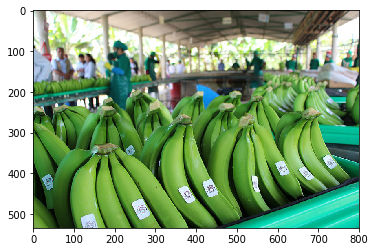

In [0]:
from skimage import io
name = "exportacion1.jpg"
img = nets.utils.load_img(name, target_size=256, crop_size=224)
assert img.shape == (1, 224, 224, 3)
et=np.array([0])
et=one_hot_transformation(et,4)
features = sess.run(model.get_middles(), {X:img})[-1]
acc=sess.run([accuracy],feed_dict={X2:features,Y:et}) 
#print ('Exportacion',acc)
imagen_rgb=io.imread(name)/255.0  # imread lee las imagenes con los pixeles codificados como enteros 
# en el rango 0-255. Por eso la convertimos a flotante y en el rango 0-1
#plt.imshow(imagen_rgb)
plt.imshow(imagen_rgb)
#print("Dimensiones de la imagen:")
#print(imagen_rgb.shape)

if (acc == [1.0]):
  print(" Es Banano de exportación") 
else:
    print("No es de exportación")
    